In [69]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, roc_auc_score, f1_score,precision_score, recall_score
from sklearn.model_selection import GridSearchCV,train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample

In [70]:
df = pd.read_csv('/content/creditcard.csv')

In [71]:
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [72]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [73]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

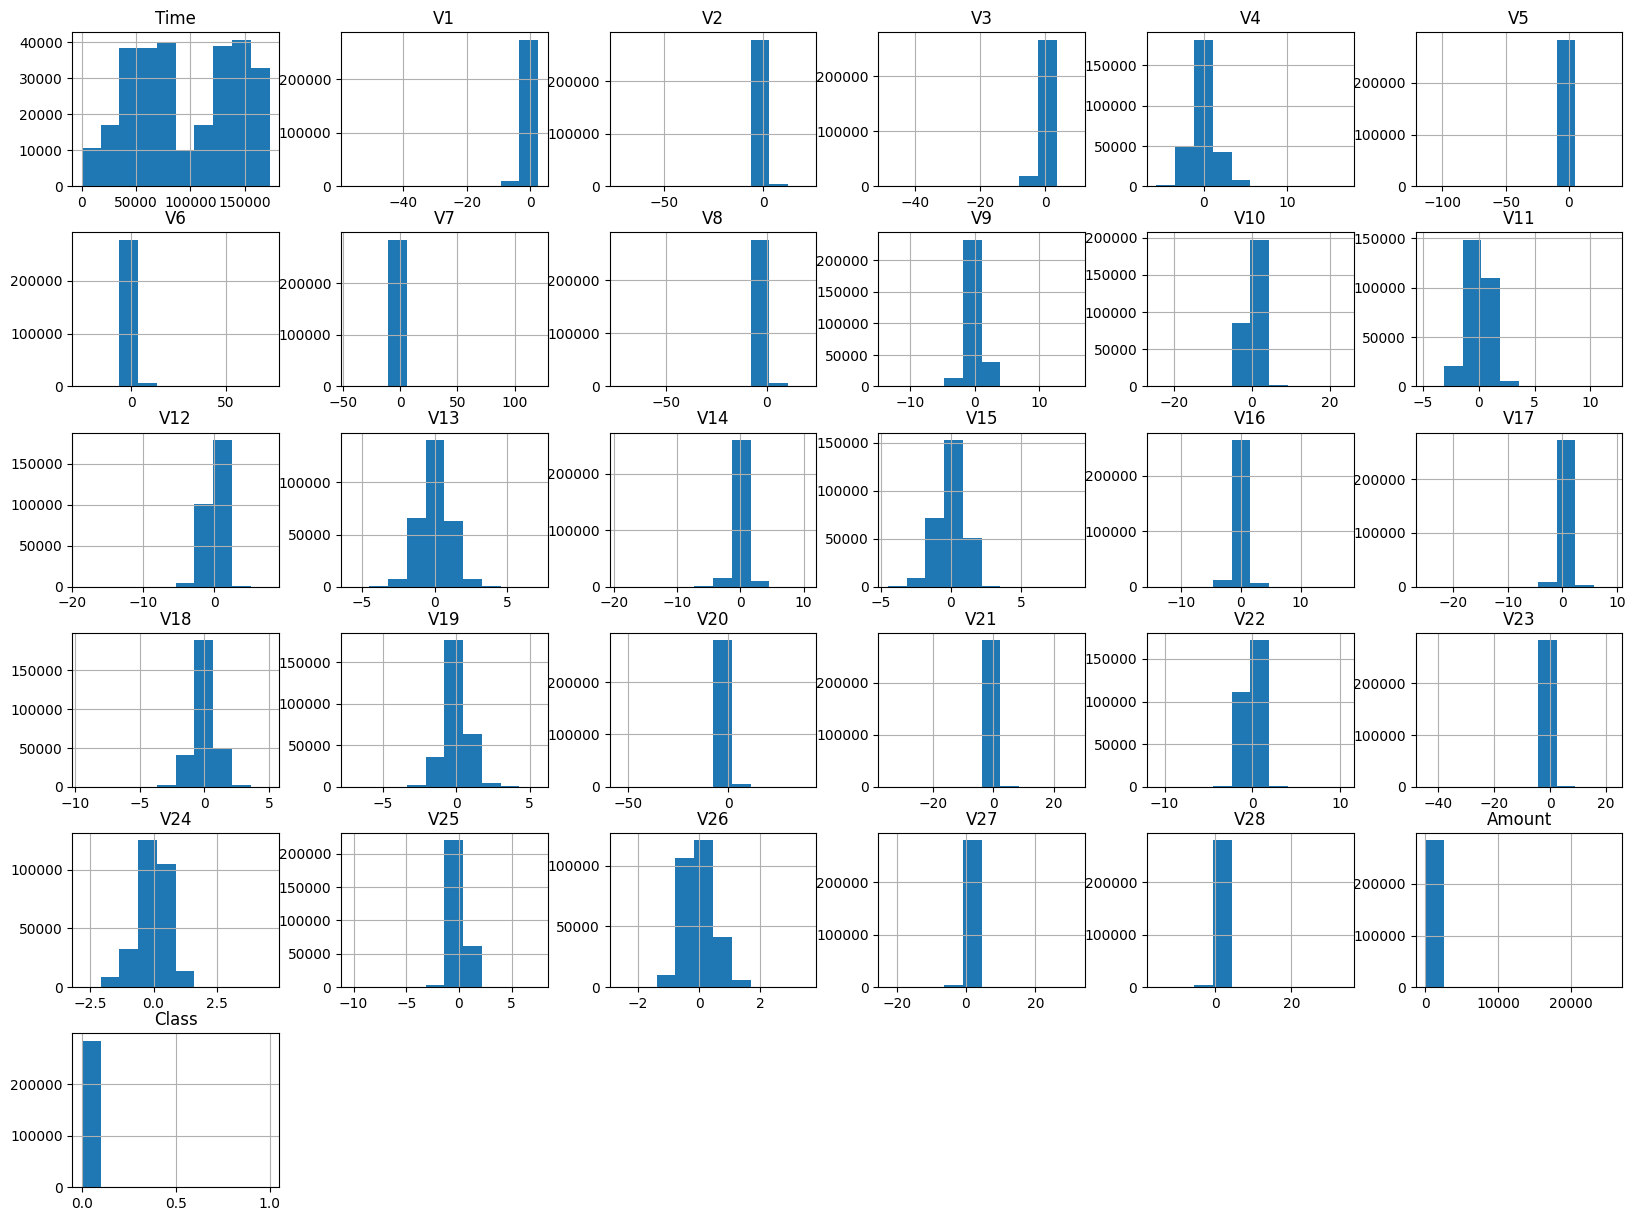

In [74]:
df.hist(figsize = (20,15))
plt.show()

In [75]:
df['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

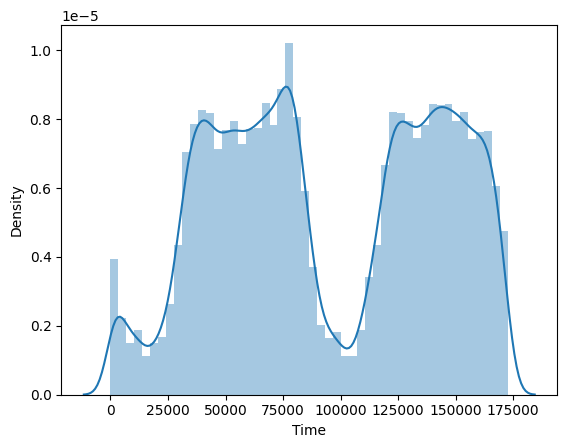

In [76]:
sns.distplot(df['Time'])
plt.show()


In [77]:
fraud_times = df[df['Class']==1]['Time'].values
fraud_times_index = df[df['Class']==1]['Time'].index

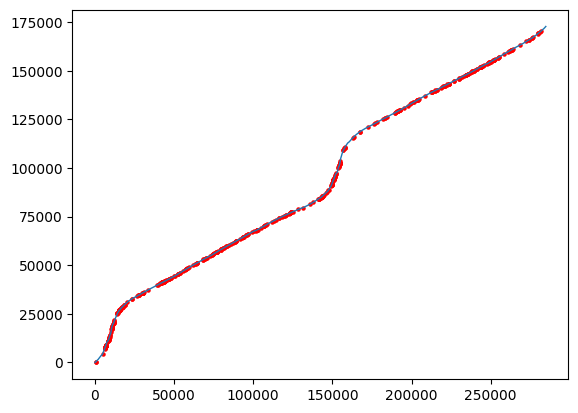

In [78]:
plt.scatter(x= fraud_times_index, y=fraud_times, color='red', marker='o', s=5)
plt.plot(df['Time'], linewidth = 1)
plt.show()


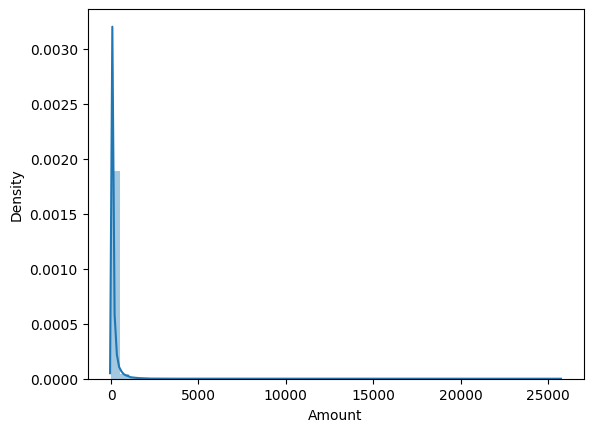

In [79]:
sns.distplot(df['Amount'])
plt.show()


In [80]:
cop = df.copy()
cop['Class'] = cop['Class'].apply(lambda x: 'Yes' if x==1 else 'No')

In [81]:
#H0: Correlation yoxdur
#H1: Correlation var
for col in df.select_dtypes(include = np.number):
    # Finds out the Prices data for each FuelType as a list
    CategoryGroupLists=df.groupby('Class')[col].apply(list)
    # Performing the ANOVA test
    # We accept the Assumption(H0) only when P-Value &gt; 0.05
    AnovaResults = f_oneway(*CategoryGroupLists)
    if AnovaResults[1]>0.05:
        print('Class ', col, ' Not Correlated' )
    else:
        print('Class ', col, ' Correlated' )

Class  Time  Correlated
Class  V1  Correlated
Class  V2  Correlated
Class  V3  Correlated
Class  V4  Correlated
Class  V5  Correlated
Class  V6  Correlated
Class  V7  Correlated
Class  V8  Correlated
Class  V9  Correlated
Class  V10  Correlated
Class  V11  Correlated
Class  V12  Correlated
Class  V13  Correlated
Class  V14  Correlated
Class  V15  Correlated
Class  V16  Correlated
Class  V17  Correlated
Class  V18  Correlated
Class  V19  Correlated
Class  V20  Correlated
Class  V21  Correlated
Class  V22  Not Correlated
Class  V23  Not Correlated
Class  V24  Correlated
Class  V25  Not Correlated
Class  V26  Correlated
Class  V27  Correlated
Class  V28  Correlated
Class  Amount  Correlated
Class  Class  Correlated


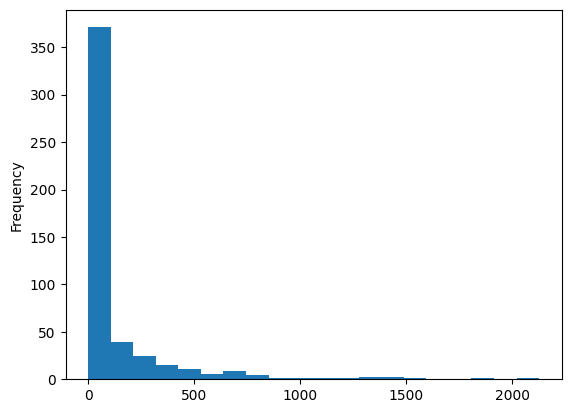

In [82]:
df[df['Class']==1]['Amount'].plot(kind = 'hist', bins = 20)
plt.show()


In [83]:
df[df['Class']==1][['Amount','Time']].agg(['mean', 'min','max', 'median'])


,Amount,Time
mean,122.211321,80746.806911
min,0.000000,406.000000
max,2125.870000,170348.000000
median,9.250000,75568.500000


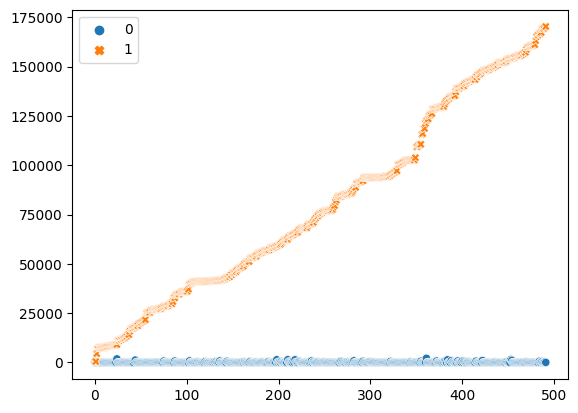

In [84]:
sns.scatterplot(df[df['Class']==1][['Amount','Time']].values)
plt.show()

In [85]:
df[df['Class']==1][['Amount','Time']]

,Amount,Time
541,0.00,406.0
623,529.00,472.0
4920,239.93,4462.0
6108,59.00,6986.0
6329,1.00,7519.0
...,...,...
279863,390.00,169142.0
280143,0.76,169347.0
280149,77.89,169351.0
281144,245.00,169966.0


In [86]:
corr_mat = df.corr()
corr_mat

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


In [87]:
corr_mat['Amount'].sort_values(ascending = False)

Amount    1.000000
V7        0.397311
V20       0.339403
V6        0.215981
V21       0.105999
V4        0.098732
V18       0.035650
V14       0.033751
V27       0.028825
V28       0.010258
V17       0.007309
Class     0.005632
V13       0.005293
V24       0.005146
V11       0.000104
V15      -0.002986
V26      -0.003208
V16      -0.003910
V12      -0.009542
Time     -0.010596
V9       -0.044246
V25      -0.047837
V19      -0.056151
V22      -0.064801
V10      -0.101502
V8       -0.103079
V23      -0.112633
V3       -0.210880
V1       -0.227709
V5       -0.386356
V2       -0.531409
Name: Amount, dtype: float64

In [88]:
def outlier(data,col):
    q1 = data[col].quantile(0.05)
    q2 = data[col].quantile(0.95)
    iqr = q2-q1
    lower_b = q1-1.5*iqr
    upper_b = q2+1.5*iqr
    print(col,data[data[col]<lower_b][col].count(), data[data[col]>upper_b][col].count())
    data.loc[data[col]<lower_b, col] = lower_b
    data.loc[data[col]>upper_b, col] = upper_b


In [89]:
df1 = df.copy()
df2 = df.copy()

In [90]:
df1.drop(['V22','V23','V25'], axis =1, inplace = True)

In [91]:
for col in df1.select_dtypes(include = np.number):
    if col =='Class':
        pass
    else:
        outlier(df1,col)

Time 0 0
V1 908 0
V2 1203 355
V3 358 1
V4 0 59
V5 453 313
V6 94 58
V7 833 577
V8 3138 837
V9 29 97
V10 250 1016
V11 0 99
V12 229 1
V13 0 1
V14 451 50
V15 0 2
V16 184 10
V17 358 164
V18 70 0
V19 2 3
V20 1227 1906
V21 1738 2561
V24 0 14
V26 0 3
V27 1798 1068
V28 1580 833
Amount 0 3574


In [92]:
# Separate the majority and minority classes
majority_class = df2[df2['Class'] == 0]
minority_class = df2[df2['Class'] == 1]

# Downsample the majority class
majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

# Combine the downsampled majority class with the minority class
balanced_df = pd.concat([minority_class, majority_downsampled])

# Split the balanced dataset into features (X) and target (y)
X_balanced = balanced_df.drop('Class', axis=1)
y_balanced = balanced_df['Class']

# Split the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [93]:
# Create a KNN classifier with k=3 (you can adjust k as needed)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test.values)
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
f1_score_knn = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
print("F1 score:\n", f1_score_knn)

Accuracy: 0.6598984771573604
Confusion Matrix:
 [[67 31]
 [36 63]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.68      0.67        98
           1       0.67      0.64      0.65        99

    accuracy                           0.66       197
   macro avg       0.66      0.66      0.66       197
weighted avg       0.66      0.66      0.66       197

F1 score:
 0.6528497409326425


In [64]:
X = df1.drop('Class', axis =1)
y = df1['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
logistic_regression_lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Train the model on the training data
logistic_regression_lasso.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lasso = logistic_regression_lasso.predict(X_test)

# Evaluate the model performance with L1 regularization
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
conf_matrix_lasso = confusion_matrix(y_test, y_pred_lasso)
classification_rep_lasso = classification_report(y_test, y_pred_lasso)
f1_score_lasso = f1_score(y_test, y_pred_lasso,average='weighted')

# Create a logistic regression model with L2 (Ridge) regularization
logistic_regression_ridge = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)

# Train the model on the training data
logistic_regression_ridge.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ridge = logistic_regression_ridge.predict(X_test)

# Evaluate the model performance with L2 regularization
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
conf_matrix_ridge = confusion_matrix(y_test, y_pred_ridge)
classification_rep_ridge = classification_report(y_test, y_pred_ridge)
f1_score_ridge = f1_score(y_test, y_pred_ridge,average='weighted')

# Print the evaluation metrics for both L1 and L2 regularization
print("L1 Regularization:")
print("Accuracy:", accuracy_lasso)
print("Confusion Matrix:\n", conf_matrix_lasso)
print("Classification Report:\n", classification_rep_lasso)
print("F1_score:\n", f1_score_lasso)

print("\nL2 Regularization:")
print("Accuracy:", accuracy_ridge)
print("Confusion Matrix:\n", conf_matrix_ridge)
print("Classification Report:\n", classification_rep_ridge)
print("F1_score:\n", f1_score_ridge)

L1 Regularization:
Accuracy: 0.9644670050761421
Confusion Matrix:
 [[98  0]
 [ 7 92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        98
           1       1.00      0.93      0.96        99

    accuracy                           0.96       197
   macro avg       0.97      0.96      0.96       197
weighted avg       0.97      0.96      0.96       197

F1_score:
 0.9644285147404239

L2 Regularization:
Accuracy: 0.9543147208121827
Confusion Matrix:
 [[97  1]
 [ 8 91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96        98
           1       0.99      0.92      0.95        99

    accuracy                           0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.96      0.95      0.95       197

F1_score:
 0.9542652332376879
